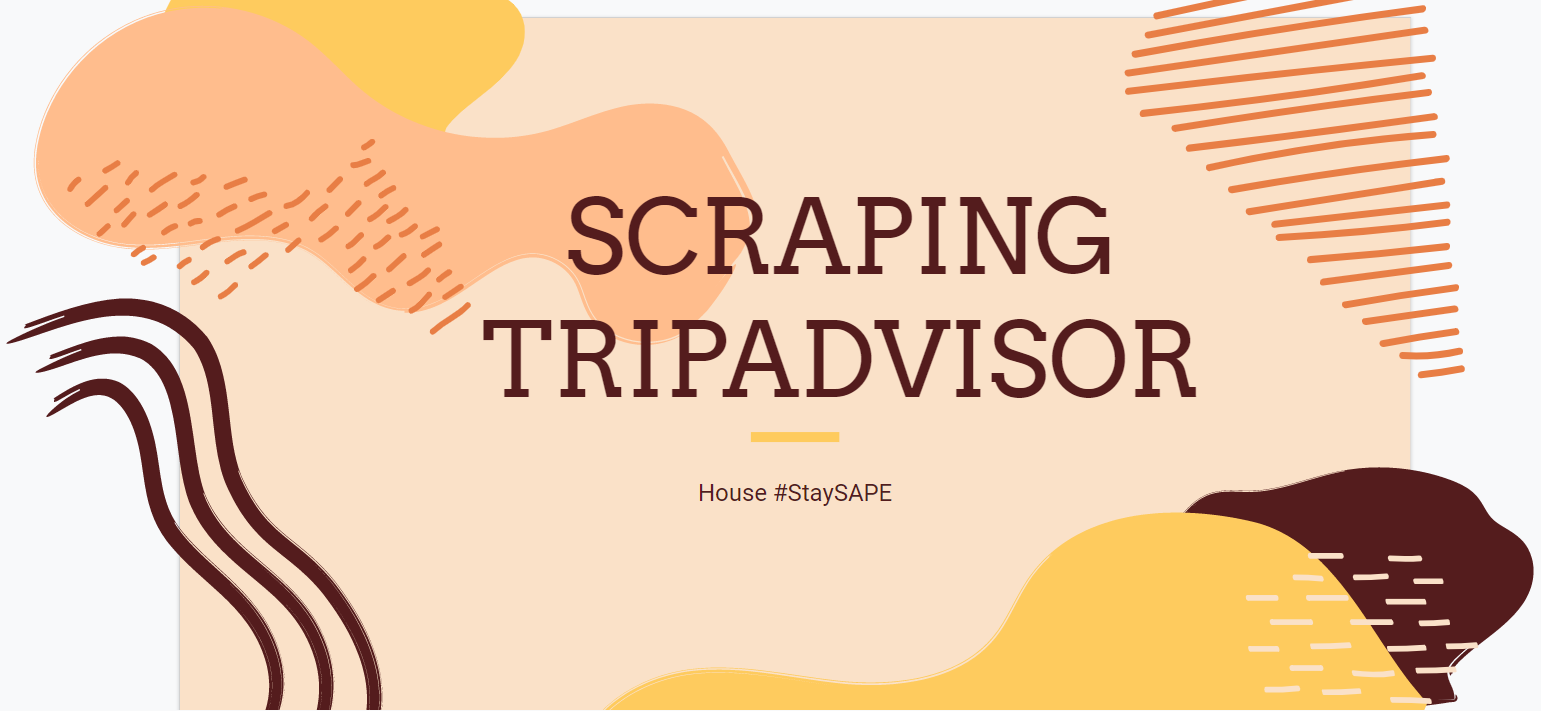

## How to Scrape Data from Trip Advisor using Beautiful Soup

by Stephene Canciller, Team StaySape

Updated on 1 Jun 2020

## What is Web Scraping?
Scraping the Web (also called Screen Scraping, Web Data Extraction, Web Harvesting etc.) is a technique used to extract large amounts of data from websites where data is extracted and stored to local files on your computer or to databases in tables (spreadsheet format). Web scraping is the process of extracting data from a website. One example of web scraping is copying contact lists from a web directory.

## Why do we need Web Scraping?
With the development of Big Data, the amount of data available is no longer counted. Imagine if we had to store a large amount of data alone in one file, what happened was only a mistake and a headache. Web scraping can help you to collect data faster. In addition, if indeed the data collected is large, we can also do automation and we don’t need to bother anymore because the important thing is we can let our server run. With the efficiency of web scraping, this also helps our data analysis process. Because web scraping helps collect all data without being left behind, we will get complete data from this process.

## What location should we focus on?

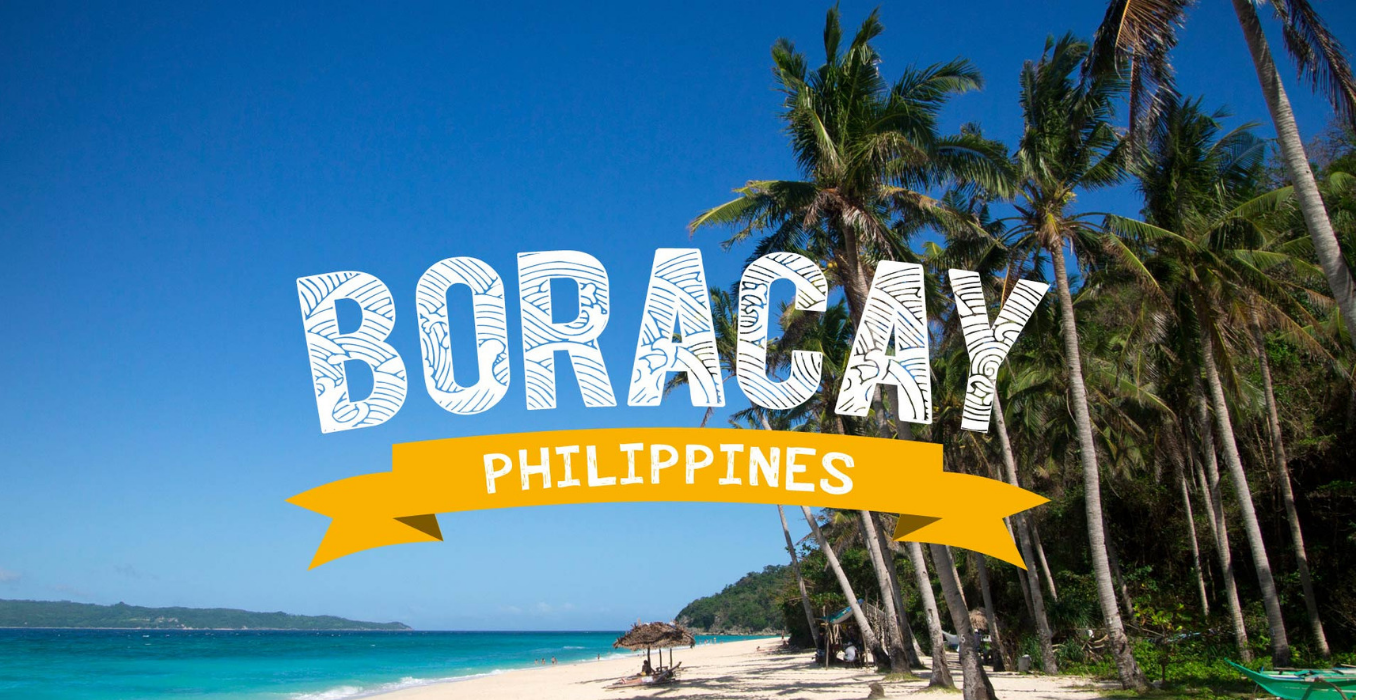

### Apart from its white sand beaches, Boracay is also famous for being one of the world's top destinations for relaxation.  

## Let's start with the Scraping Work Flow

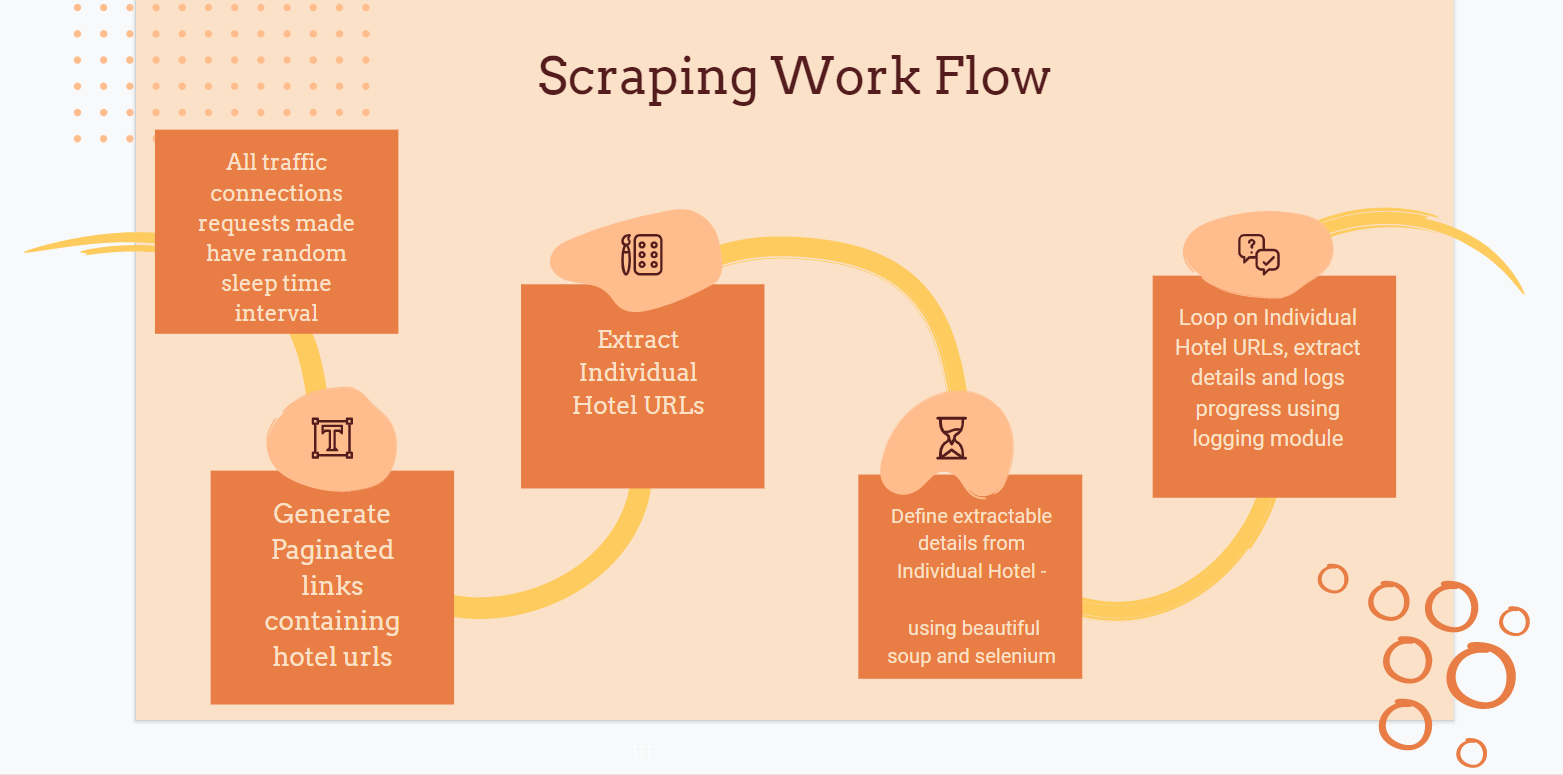

# Import Libraries

In [17]:
from bs4 import BeautifulSoup
import requests
import selenium
import random
from time import sleep
import pandas as pd

### We would require python packages like pandas, beautiful soup and requests. 

Firstly we will import all the packages, after that we will declare the url of the website under any variable name and will use requests.get() to open that link and then will pass it to the BeautifulSoup function which will return the HTML code of the website.

#  Constants

In [18]:
baseurl = 'https://www.tripadvisor.com.ph'

In [19]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0'} 

In [20]:
def urlToBs(url, headers):
    sleep(random.uniform(3,4))
    pg = requests.get(url, headers)
    bs = BeautifulSoup(pg.content, 'html.parser')
    return bs

All traffic connections requests made have random sleep time interval. Notice the crawl delay of 3-4 seconds which means that each bot should only send one request every 3-4 seconds. It is good practice, in general, to let your crawler or scraper sleep in regular (rather large) intervals since too many requests can bring down sites down, even when they come from human users.

##  Generated Pagination Urls

In [21]:
def sp_to_lturl(bsPage):
    return [a.find("a")['href'] for a in bsPage.find_all("div", {'class':"listing_title"})] 

In [22]:
pageUrls = []
for i in range(21):
    if i  == 0:
        url = baseurl + '/Hotels-g294260-Boracay_Malay_Aklan_Province_Panay_Island_Visayas-Hotels.html#BODYCON'
    else:
        url = baseurl +  '/Hotels-g294260-oa' + str(i*30) + '-Boracay_Malay_Aklan_Province_Panay_Island_Visayas-Hotels.html#BODYCON'
    pageUrls.append(url)

In [23]:
hturllt = []
for purls in pageUrls:
    print(purls)
    bsPage = urlToBs(purls, headers)
    hturllt += sp_to_lturl(bsPage) 

https://www.tripadvisor.com.ph/Hotels-g294260-Boracay_Malay_Aklan_Province_Panay_Island_Visayas-Hotels.html#BODYCON
https://www.tripadvisor.com.ph/Hotels-g294260-oa30-Boracay_Malay_Aklan_Province_Panay_Island_Visayas-Hotels.html#BODYCON
https://www.tripadvisor.com.ph/Hotels-g294260-oa60-Boracay_Malay_Aklan_Province_Panay_Island_Visayas-Hotels.html#BODYCON
https://www.tripadvisor.com.ph/Hotels-g294260-oa90-Boracay_Malay_Aklan_Province_Panay_Island_Visayas-Hotels.html#BODYCON
https://www.tripadvisor.com.ph/Hotels-g294260-oa120-Boracay_Malay_Aklan_Province_Panay_Island_Visayas-Hotels.html#BODYCON
https://www.tripadvisor.com.ph/Hotels-g294260-oa150-Boracay_Malay_Aklan_Province_Panay_Island_Visayas-Hotels.html#BODYCON
https://www.tripadvisor.com.ph/Hotels-g294260-oa180-Boracay_Malay_Aklan_Province_Panay_Island_Visayas-Hotels.html#BODYCON
https://www.tripadvisor.com.ph/Hotels-g294260-oa210-Boracay_Malay_Aklan_Province_Panay_Island_Visayas-Hotels.html#BODYCON
https://www.tripadvisor.com.ph/Ho

In [24]:
len(hturllt)

612

In [25]:
hotelUrls =  [baseurl+str(url) for url in hturllt]

###  Full Code

In [26]:
def bsclass_text(bs,clstr):
    return bs.find(class_ = clstr).get_text() 

In [27]:
def getprice(bsHotel):
    if bsHotel.find(class_ = 'hotels-hotel-offers-DetailChevronOffer__price--py2LH'):
        price = bsHotel.find(
            class_ = 'hotels-hotel-offers-DetailChevronOffer__price--py2LH').get_text()
    elif bsHotel.find(class_ = 'hotels-hotel-offers-DominantOffer__price--D-ycN'):
        price = bsHotel.find(
            class_ = 'hotels-hotel-offers-DominantOffer__price--D-ycN').get_text()
    else:
        price = ''
    return price 

In [28]:
def getAllReviews(bsHotel):
    ltord = [a.get_text() for a in bsHotel.find_all(class_ = 'location-review-review-list-parts-ReviewRatingFilter__row_num--3cSP7')]
    return tuple(ltord)

In [29]:
def getHotelDetails(bsHotel):
    try:
        title =  bsHotel.find(id='HEADING').get_text()
        price = getprice(bsHotel)
        rating = bsclass_text(bsHotel
            , 'hotels-hotel-review-about-with-photos-Reviews__overallRating--vElGA')
        totalRev = bsclass_text(bsHotel
            , 'hotels-community-content-common-TabAboveHeader__tabCount--26Tct')
        excRev, vgRev, aveRev, poorRev, terRev =  getAllReviews(bsHotel)
        nearbyResto = bsclass_text( bsHotel
            , 'hotels-hotel-review-location-layout-Highlight__orange--1N-BP')
        nearbyAttractions = bsclass_text( bsHotel
            , 'hotels-hotel-review-location-layout-Highlight__blue--2qc3K')
    except:
        print('error')
        title =  bsHotel.find(id='HEADING').get_text() + 'error'
        price = ''
        rating = ''
        totalRev = ''
        excRev, vgRev, aveRev, poorRev, terRev = '', '', '', '', ''
        nearbyResto = ''
        nearbyAttractions = ''
        
    return {'title': title
            , 'price': price
            , 'rating' : rating
            , 'totalRev': totalRev
            , 'excellentRev':excRev
            , 'verygoodRev':vgRev
            , 'averageRev':aveRev
            , 'poorRev':poorRev
            , 'terribleRev':terRev
            , 'nearbyRestaurant':nearbyResto
            , 'nearbyAttractions':nearbyAttractions
           }

## Individual Data Looper

In [30]:
detailslt  = []
i = 0
for hurl in hotelUrls:
    i += 1
    print(i)
    print(hurl)
    bsHotel = urlToBs(hurl, headers)
    detailslt.append(getHotelDetails(bsHotel))

1
https://www.tripadvisor.com.ph/Hotel_Review-g294260-d650466-Reviews-Discovery_Shores-Boracay_Malay_Aklan_Province_Panay_Island_Visayas.html
2
https://www.tripadvisor.com.ph/Hotel_Review-g294260-d13808619-Reviews-La_Banca_House_at_Boracay-Boracay_Malay_Aklan_Province_Panay_Island_Visayas.html
error
3
https://www.tripadvisor.com.ph/Hotel_Review-g294260-d537729-Reviews-Dave_s_Straw_Hat_Inn-Boracay_Malay_Aklan_Province_Panay_Island_Visayas.html
4
https://www.tripadvisor.com.ph/Hotel_Review-g294260-d8470978-Reviews-Jeepney_Hostel_and_Kite_Resort-Boracay_Malay_Aklan_Province_Panay_Island_Visayas.html
5
https://www.tripadvisor.com.ph/Hotel_Review-g294260-d8305704-Reviews-Astoria_Current-Boracay_Malay_Aklan_Province_Panay_Island_Visayas.html
6
https://www.tripadvisor.com.ph/Hotel_Review-g294260-d10006371-Reviews-Coast-Boracay_Malay_Aklan_Province_Panay_Island_Visayas.html
7
https://www.tripadvisor.com.ph/Hotel_Review-g294260-d7130410-Reviews-The_Lind_Boracay-Boracay_Malay_Aklan_Province_Pana

As we get the soup object there now we can get our desired data using various function calls provided by BeautifulSoup. To get the pagination data you need from that website you must have basic understanding about HTML tags and class and how they work.

Here in my case, the website I was scraping had titles and links inside "a" tag which were inside a "div" tag with class listing_title

So I used the find_all() method available in BeautifulSoup to get all the "div" tags with class equal to listing_title and got all the tags.
    
Now from that tags I had to find links and title associated with that and then open those link like we did earlier using requests.get() and then again scrap all the content from that link.

In [39]:
bsdf  = pd.DataFrame(detailslt)

In [49]:
bsdf

,title,price,rating,totalRev,excellentRev,verygoodRev,averageRev,poorRev,terribleRev,nearbyRestaurant,nearbyAttractions
0,Discovery Shores,,4.5,"2,109","1,610",325,94,43,37,61,10
1,La Banca House at Boracayerror,,,,,,,,,,
2,Dave's Straw Hat Inn,,4.5,926,677,203,25,16,5,33,3
3,Jeepney Hostel and Kite Resort,,5.0,141,117,17,4,2,1,29,3
4,Astoria Current,,5.0,"2,132","1,879",189,43,10,11,43,4
...,...,...,...,...,...,...,...,...,...,...,...
607,Wald's Placeerror,,,,,,,,,,
608,El Dominador Guest Houseerror,,,,,,,,,,
609,Cliff Houseerror,,,,,,,,,,
610,Evelyn's Placeerror,,,,,,,,,,


##  Hotel Details that we got 

1. Hotel Ratings
2. Number of Amenities
3. Number of Reviews
4. Hotel Price
5. Number of Nearby Restaurants
6. Number of Nearby Attractions

In [52]:
bsdf.to_csv('bsdf.csv')

We will store the scraped data into a .csv file using the above code

## Limitations

1. Due to ECQ, only few hotels have posted their hotel price.
2. Web page content changes from time to time
3. Unable to scrape date information

## Conclusion

Web scraping can be really useful when you want to gather data from multiple sources for analysis or for research. BeautifulSoup is an excellent web scraping library which can be used for small projects but for large projects other libraries like Scrapy are more suitable. Hope you have understood the concept of web scraping and can now scrape data from different websites as per your need.

## Warning for web scraping

The legality of this practice is not well defined however. Websites usually describe in their terms of use and in their robots.txt file if they allow scrapers or not. So please be careful not to tread in restricted territories or not to hit the URL with a huge number of requests in a short duration causing issues with the website itself :)